In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

# 1.找出距离每个样本最近的聚类中心

In [2]:
def findClosestCentroids(X, centroids):
    c = np.empty((0,X.shape[0]))
    for i in range(len(centroids)):
        c = np.vstack((c,np.sum((X - centroids[i])**2,axis = 1)))#这里利用了numpy的广播原理，和ndarray的垂直堆叠方法
    idx = np.argmin(c, axis = 0)#找出每列的最小值的索引
    return idx

In [3]:
data = loadmat(".\\data\\ex7data2.mat")

In [5]:
X = data["X"]
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findClosestCentroids(X,initial_centroids)
idx[0:3]

array([0, 2, 1], dtype=int64)

# 2.更新聚类中心

In [6]:
def computeCentroids(X,centroids,idx):
    new_centroids = np.empty((0,centroids.shape[1]))
    for i in range(len(centroids)):
        c = X[idx == i]#用掩码数组选择对应聚簇的所有样本
        new_centroids = np.vstack((new_centroids,c.mean(axis=0)))#计算同一聚簇的平均聚类中心
    return new_centroids
computeCentroids(X,initial_centroids,idx)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

# 3.运行k-means聚类算法

In [7]:
def k_means(X,K,epoch):
    randidx = np.random.randint(1,X.shape[0])
    centroids = X[randidx - K:randidx]#随机初始化，取随机索引的前K个样本作为初始化聚类中心
    for i in range(epoch):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X,centroids,idx )
    return centroids,idx

In [12]:
centorids,idx = k_means(X,K=3,epoch=500)

# 4.效果展示

In [45]:
def show_k_means(input,K=3,epoch=500):
    centorids,idx = k_means(input,K,epoch)
    clusters = []
    for i in range(K):
        clusters.append("cluster{}".format(i))
    fig, axarr = plt.subplots(1,2,figsize=(21,8))
    for i in range(K):
        clusters[i] = X[np.where(idx == i)[0],:]
        axarr[1].scatter(clusters[i][:,0], clusters[i][:,1], s=30, cmap='rainbow', label='Cluster{}'.format(i))
    axarr[1].legend()
    axarr[0].scatter(X[:,0],X[:,1])
    plt.show()

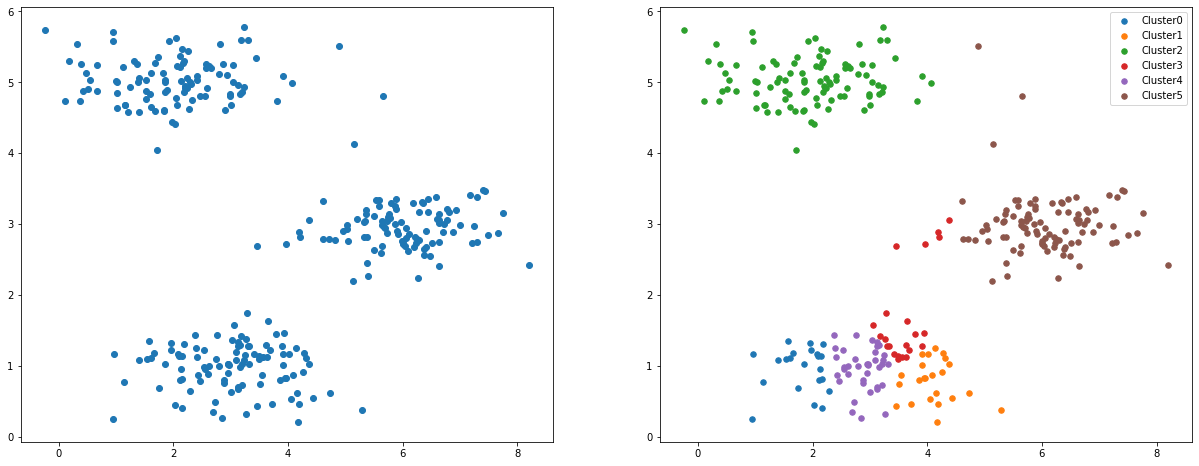

In [76]:
show_k_means(X,K=6)

# 5.用k-means对图像进行压缩

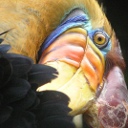

In [52]:
from IPython.display import Image
Image(filename='data/bird_small.png')

In [53]:
data = loadmat(".\\data\\bird_small.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [54]:
A = data["A"]
A.shape

(128, 128, 3)

In [55]:
"预处理"
pit = A/255
pit = pit.reshape(pit.shape[0]*pit.shape[1],pit.shape[2])

In [58]:
centroids, idx = k_means(pit, 16, 500)
idx = findClosestCentroids(pit, centroids)
X_recovered = centroids[idx,:]
X_recovered.shape

(16384, 3)

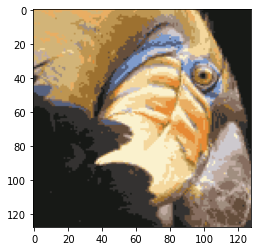

In [59]:
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
plt.imshow(X_recovered)
plt.show()